In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import sklearn
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
data.shape

(15039, 11)

In [9]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

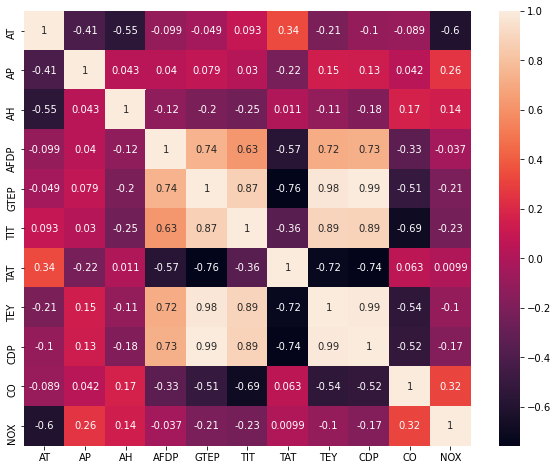

In [10]:
fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)

In [11]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [12]:
ss = StandardScaler()
X = ss.fit_transform(X)
y = ss.fit_transform(y)

In [13]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [16]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print(f"Results: {results.mean()} ({results.std()}) MSE")

Results: -0.19901873171329498 (0.14065866494069273) MSE


In [17]:
estimator.fit(X, y)
prediction = estimator.predict(X)

In [18]:
prediction

array([-1.1767491, -1.1873202, -1.1808997, ..., -1.5688504, -1.491274 ,
       -1.4079891], dtype=float32)

Applying inverse transform on prediction to bring original values

In [20]:
a=ss.inverse_transform(prediction)

In [21]:
b=ss.inverse_transform(y)

Calculate error of model actual and predicted values

In [22]:
mean_squared_error(b,a)

9.51271075700297

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [24]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [25]:
prediction

array([ 0.43454236, -1.2487766 ,  0.6400384 , ..., -0.06723456,
        1.9341986 ,  0.935945  ], dtype=float32)

__Inverse transform on prediction to convert to original values¶__

In [26]:
pred=ss.inverse_transform(prediction)

In [27]:
test=ss.inverse_transform(y_test)

In [28]:
mean_squared_error(pred,test)

41.44160762040625